<a href="https://colab.research.google.com/github/zkinard/CS-4410-Intro-to-Machine-Learning/blob/main/KinardWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#Load dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [127]:
#Check the sample and target sizes
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [128]:
cancer.data.shape

(569, 30)

In [129]:
#Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [130]:
#Training and testing set sizes
X_train.shape

(426, 30)

In [131]:
X_test.shape

(143, 30)

In [132]:
#Creating the model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [133]:
#Train the model
nb.fit(X=X_train, y=y_train)

GaussianNB()

In [134]:
#Predicting
predicted = nb.predict(X=X_test)
expected = y_test

In [135]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [136]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [137]:
#Estimator method score
print(f'{nb.score(X_test, y_test):.2%}')

95.10%


In [138]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred=predicted)
confusion

array([[44,  6],
       [ 1, 92]])

In [139]:
#Classification Report
from sklearn.metrics import classification_report
names = [str(cancer) for cancer in cancer.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



In [140]:
#Visualizing the confusion matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

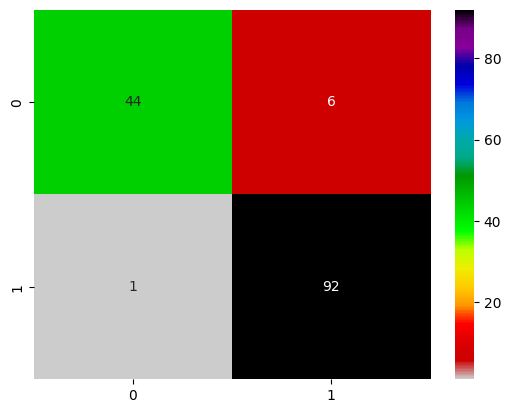

In [141]:
import seaborn as sns
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [142]:
#K-Fold Cross-Validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [143]:
#Using KFold object with cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=nb, X=cancer.data, y=cancer.target, cv=kfold)
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [144]:
#Mean
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [145]:
#Standard Deviation
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.75%


In [146]:
#Running multiple models to find best one
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators = {'GaussianNB':nb,'KNeighborsClassifier':KNeighborsClassifier(),
  'LogisticRegression':LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
  'SVC':SVC(gamma='scale')}

In [147]:
#Execute Models and print
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
                            X=cancer.data, y=cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' +
        f'mean accuracy = {scores.mean():.2%}; ' +
        f'standard deviation = {scores.std():.2%}')

          GaussianNB: mean accuracy = 93.85%; standard deviation = 2.75%
KNeighborsClassifier: mean accuracy = 92.79%; standard deviation = 2.01%
  LogisticRegression: mean accuracy = 95.08%; standard deviation = 3.02%
                 SVC: mean accuracy = 91.92%; standard deviation = 3.52%
